# Import Standard Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

sns.set(style='darkgrid')
sns.set_palette('husl', 8)
params = {'font.family': 'Times New Roman', 'axes.labelsize': 11, 'xtick.labelsize': 11, 
          'ytick.labelsize': 11, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)

# Upload Data
## Moderator

In [2]:
path = r'C:/Users/Bryan Aurelius/Downloads/Python/Scrapper/'
file = 'ad_ranking_raw_data (Final).xlsx'

mod = pd.read_excel(path + file, sheet_name='moderator dimension (dim table)', dtype={'moderator': str}).sample(n=11)
mod.tail()

,moderator,market,Productivity,Utilisation %,handling time,accuracy
1338,3713193,"[""VN""]",16.406667,0.922271,7667,0.75
1304,1693578512149506,"[""VN""]",229.902500,0.883542,101221,0.92
382,1738218399766529,"[""GB""]",331.520000,0.791807,111146,0.845
201,1755541489126450,"[""MY""]",456.670000,0.946424,81253,0.957
1231,1763709640109090,"[""NL""]",198.970000,0.790365,93042,0.932


In [3]:
mod.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 812 to 1231
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moderator      11 non-null     object 
 1   market         11 non-null     object 
 2   Productivity   11 non-null     float64
 3   Utilisation %  11 non-null     float64
 4   handling time  11 non-null     int64  
 5    accuracy      11 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1 KB


In [4]:
mod.columns = ['moderator_id', 'market', 'productivity', 'utilisation', 'handling_time', 'accuracy']

# Assuming it's in percentage
mod['utilisation'] = mod['utilisation']

# Change to hours assuming it's in seconds
mod['handling_time'] = mod['handling_time'] / 3600

# Data cleansing and change to numeric from string
mod['accuracy'] = mod['accuracy'].replace('                 -  ', '0').astype(float)
mod['market'] = mod['market'].str.replace('\[|\]|"|"| ', '', regex=True)
mod['total_market'] = mod['market'].str.count(',') + 1
mod['log_odd'] = np.log(mod['accuracy'] / (1 - mod['accuracy']))
mod.tail()

,moderator_id,market,productivity,utilisation,handling_time,accuracy,total_market,log_odd
1338,3713193,VN,16.406667,0.922271,2.129722,0.750,1,1.098612
1304,1693578512149506,VN,229.902500,0.883542,28.116944,0.920,1,2.442347
382,1738218399766529,GB,331.520000,0.791807,30.873889,0.845,1,1.695912
201,1755541489126450,MY,456.670000,0.946424,22.570278,0.957,1,3.102603
1231,1763709640109090,NL,198.970000,0.790365,25.845000,0.932,1,2.617825


In [5]:
mod.describe()

,productivity,utilisation,handling_time,accuracy,total_market,log_odd
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,322.275287,0.832167,22.864419,0.852182,1.090909,2.141878
std,157.189994,0.082739,11.045878,0.150116,0.301511,1.109257
min,16.406667,0.721688,2.129722,0.500000,1.000000,0.000000
25%,214.436250,0.776104,18.368194,0.797500,1.000000,1.397262
50%,331.520000,0.797262,22.669722,0.922000,1.000000,2.469836
75%,454.203750,0.906888,26.992778,0.949500,1.000000,2.945083
max,526.850000,0.946424,44.827500,0.966000,2.000000,3.346803


In [6]:
from ydata_profiling import ProfileReport

mod_eda = ProfileReport(mod, title='Moderator Data Exploratory', explorative=True)
mod_eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import warnings
import ppscore as pps

def predictive_power(data, variables, target=None, plotsize=(11,11)):
    cols = variables + [target] if target != None else variables
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        corrs = pps.matrix(data[cols]).pivot(columns='x', index='y', values='ppscore')
        print('\033[1mPredictive Power Score Matrix:\033[0m')

        fig, ax = plt.subplots(figsize=plotsize)
        ax = sns.heatmap(corrs, annot=True, fmt='.1%', cmap='RdYlGn', cbar_kws={'shrink': 0.8}, 
                         vmin=0, center=0.5, vmax=1, square=True, linewidths=0.1, linecolor='white')
        plt.show()

Predictive Power Score Matrix:


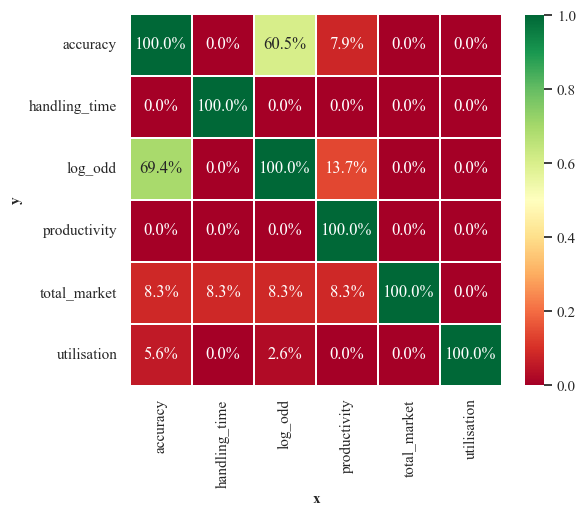

In [8]:
variables = ['productivity', 'utilisation', 'handling_time', 'total_market', 'accuracy', 'log_odd']
predictive_power(mod, variables, plotsize=(6, 6))

In [9]:
market = []

for x in mod['market']:
    market += list(x.split(','))
    
market = pd.DataFrame({'country': market})
market = pd.DataFrame(market['country'].value_counts())
market.head()

,country
MY,2
VN,2
GR,1
NO,1
US,1


In [10]:
market.describe()

,country
count,10.000000
mean,1.200000
std,0.421637
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [11]:
market.query("country == 1")

,country
GR,1
NO,1
US,1
CA,1
FR,1
KH,1
GB,1
NL,1


In [12]:
cty1 = market.query("country == 1").index
cty1

Index(['GR', 'NO', 'US', 'CA', 'FR', 'KH', 'GB', 'NL'], dtype='object')

In [13]:
# Consider to divide countries into their languages
for country in market.index:
    mod[country] = mod['market'].str.contains(country).astype(int)
    
mod.tail()

,moderator_id,market,productivity,utilisation,handling_time,accuracy,total_market,log_odd,MY,VN,GR,NO,US,CA,FR,KH,GB,NL
1338,3713193,VN,16.406667,0.922271,2.129722,0.750,1,1.098612,0,1,0,0,0,0,0,0,0,0
1304,1693578512149506,VN,229.902500,0.883542,28.116944,0.920,1,2.442347,0,1,0,0,0,0,0,0,0,0
382,1738218399766529,GB,331.520000,0.791807,30.873889,0.845,1,1.695912,0,0,0,0,0,0,0,0,1,0
201,1755541489126450,MY,456.670000,0.946424,22.570278,0.957,1,3.102603,1,0,0,0,0,0,0,0,0,0
1231,1763709640109090,NL,198.970000,0.790365,25.845000,0.932,1,2.617825,0,0,0,0,0,0,0,0,0,1


## Advertisement

In [14]:
ads = pd.read_excel(path + file, sheet_name='ads dimension (dim table)', dtype={'ad_id': str},skiprows=1).sample(n=11)
ads.tail()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
2561,20230807,1752097687092270,ID,ID,NaN,2000-01-01,32.4217,32.7277,2022-12-13 08:41:00,1.80,Auction Ads,auction_relation
24132,20230807,1773555840991290,ID,ID,NaN,2000-01-01,6.2200,2.9169,2023-08-07 07:49:00,1.80,Auction Ads,auction_relation
7006,20230807,1773031676532730,PH,NaN,NaN,2000-01-01,2.8127,1.2191,2023-08-01 13:06:00,0.54,Non-Auction Ads,Promote
17192,20230807,1773512193653760,TR,NaN,NaN,2000-01-01,11.0395,2.2952,2023-08-06 20:17:00,0.54,Non-Auction Ads,Promote
31449,20230807,1773591804453930,MY,MY,NaN,2000-01-01,0.0400,4.2856,2023-08-07 17:18:00,2.31,Auction Ads,auction_relation


In [15]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 11972 to 31449
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   p_date                    11 non-null     int64         
 1   ad_id                     11 non-null     object        
 2   delivery_country          11 non-null     object        
 3   queue_market              5 non-null      object        
 4   punish_num                0 non-null      float64       
 5   latest_punish_begin_date  11 non-null     datetime64[ns]
 6   ad_revenue                11 non-null     float64       
 7   avg_ad_revenue            11 non-null     float64       
 8   start_time                11 non-null     datetime64[ns]
 9   baseline_st               11 non-null     float64       
 10  product_line              11 non-null     object        
 11  task_type_en              11 non-null     object        
dtypes: datetime64[ns]

In [16]:
cols = {'punish_num': 'punishment', 'latest_punish_begin_date': 'last_punishment_date', 'baseline_st': 'task_complexity'}
ads.rename(columns=cols, inplace=True)
ads.drop(columns=['p_date'], inplace=True)
ads['punishment'] = ads['punishment'].fillna(0)
ads.tail()

,ad_id,delivery_country,queue_market,punishment,last_punishment_date,ad_revenue,avg_ad_revenue,start_time,task_complexity,product_line,task_type_en
2561,1752097687092270,ID,ID,0.0,2000-01-01,32.4217,32.7277,2022-12-13 08:41:00,1.80,Auction Ads,auction_relation
24132,1773555840991290,ID,ID,0.0,2000-01-01,6.2200,2.9169,2023-08-07 07:49:00,1.80,Auction Ads,auction_relation
7006,1773031676532730,PH,NaN,0.0,2000-01-01,2.8127,1.2191,2023-08-01 13:06:00,0.54,Non-Auction Ads,Promote
17192,1773512193653760,TR,NaN,0.0,2000-01-01,11.0395,2.2952,2023-08-06 20:17:00,0.54,Non-Auction Ads,Promote
31449,1773591804453930,MY,MY,0.0,2000-01-01,0.0400,4.2856,2023-08-07 17:18:00,2.31,Auction Ads,auction_relation


In [17]:
np.mean(ads['ad_revenue'] <= 2)

0.36363636363636365

In [18]:
cols = ['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']
ads[cols].describe()

,punishment,ad_revenue,avg_ad_revenue,task_complexity
count,11.0,11.000000,11.000000,11.000000
mean,0.0,7.782045,6.111727,1.197273
std,0.0,9.721367,9.256248,0.792642
min,0.0,0.000000,0.255200,0.540000
25%,0.0,0.814050,1.510350,0.540000
50%,0.0,6.220000,2.916900,0.540000
75%,0.0,9.639900,6.322950,1.800000
max,0.0,32.421700,32.727700,2.460000


In [19]:
cols = ['productivity', 'utilisation', 'handling_time', 'accuracy', 'total_market']
mod[cols].describe()

,productivity,utilisation,handling_time,accuracy,total_market
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,322.275287,0.832167,22.864419,0.852182,1.090909
std,157.189994,0.082739,11.045878,0.150116,0.301511
min,16.406667,0.721688,2.129722,0.500000,1.000000
25%,214.436250,0.776104,18.368194,0.797500,1.000000
50%,331.520000,0.797262,22.669722,0.922000,1.000000
75%,454.203750,0.906888,26.992778,0.949500,1.000000
max,526.850000,0.946424,44.827500,0.966000,2.000000


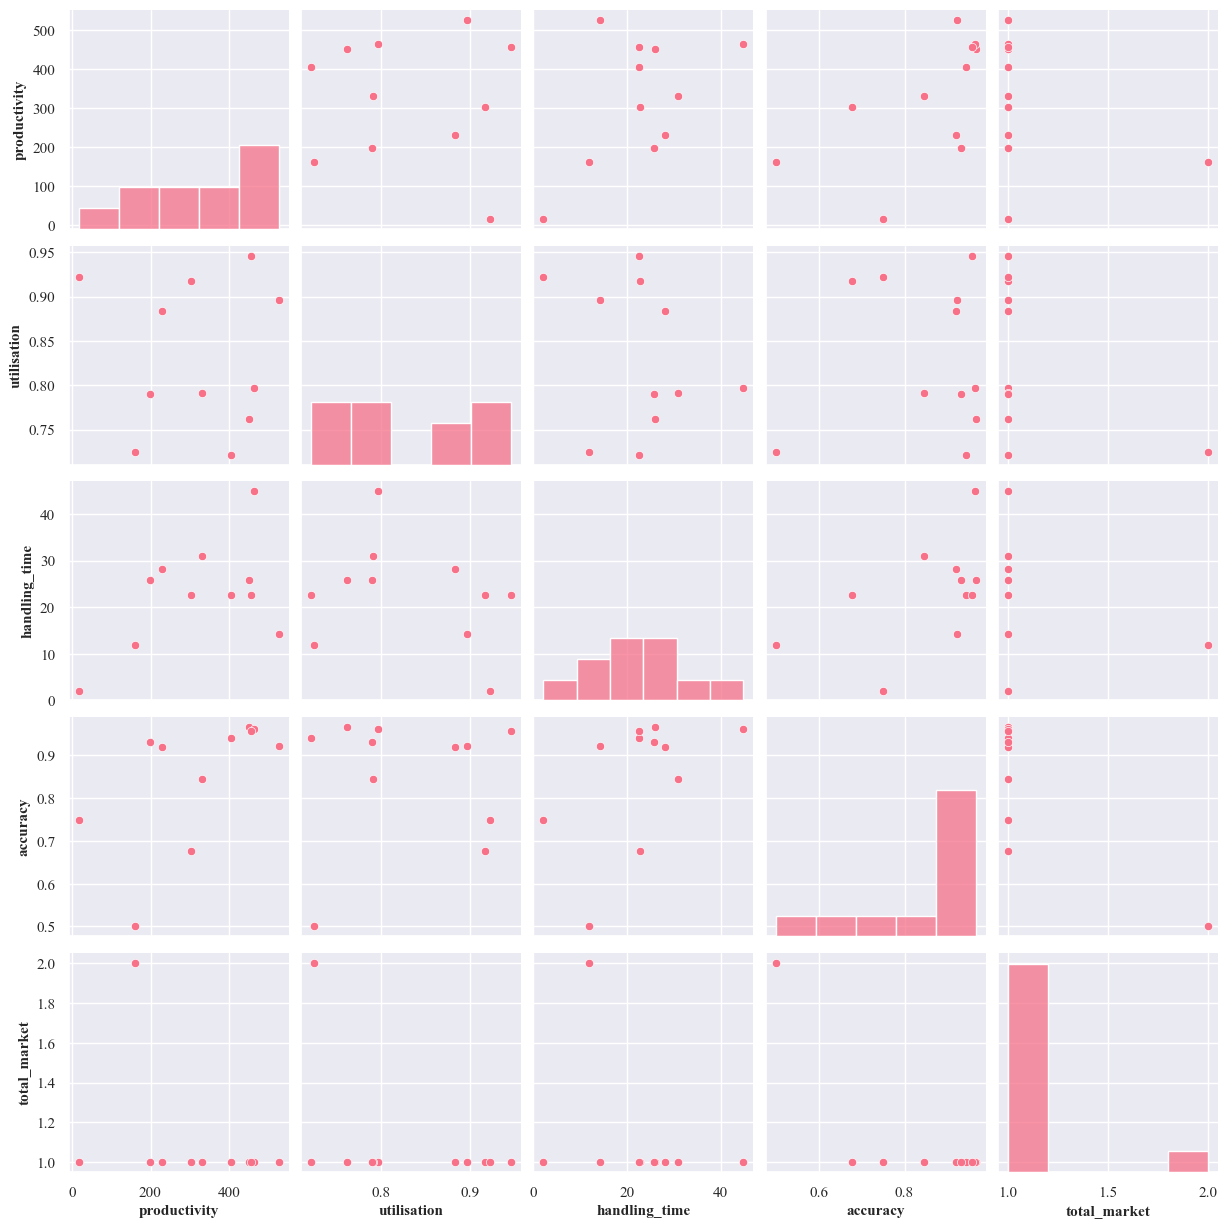

In [20]:
sns.pairplot(data=mod, vars=cols)
plt.show()

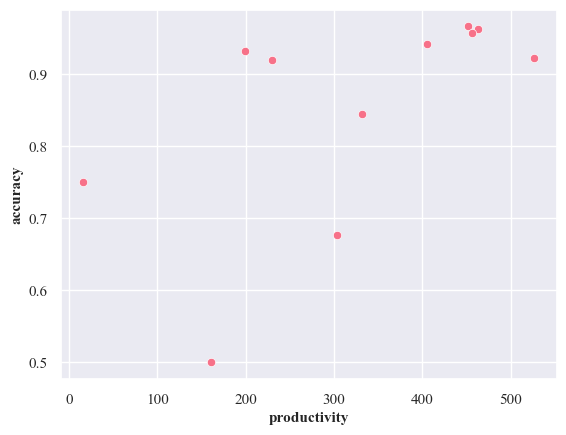

In [21]:
sns.scatterplot(data=mod, x='productivity', y='accuracy')
plt.show()

In [22]:
mod['total_market'].value_counts(normalize=True)

1    0.909091
2    0.090909
Name: total_market, dtype: float64

In [29]:
ads

,ad_id,delivery_country,queue_market,punishment,last_punishment_date,ad_revenue,avg_ad_revenue,start_time,task_complexity,product_line,task_type_en
11972,1773405288132600,VN,NaN,0.0,2000-01-01,0.0000,1.7049,2023-08-05 15:58:00,0.54,Non-Auction Ads,Promote
30184,1773581497531390,HU,Others,0.0,2000-01-01,8.2403,8.7711,2023-08-07 15:38:00,1.56,Auction Ads,auction_all
28255,1773530437599230,VN,NaN,0.0,2000-01-01,0.3781,0.2552,2023-08-07 12:34:00,0.54,Non-Auction Ads,Promote
15210,1773483177511930,SA,NaN,0.0,2000-01-01,16.7402,3.3772,2023-08-06 12:37:00,0.54,Non-Auction Ads,Promote
28811,1773576629032970,PH,PH,0.0,2000-01-01,6.4600,8.3603,2023-08-07 13:19:00,2.46,Auction Ads,auction_relation
32143,1773589186535460,US,NaN,0.0,2000-01-01,1.2500,1.3158,2023-08-07 18:55:00,0.54,Non-Auction Ads,Promote
2561,1752097687092270,ID,ID,0.0,2000-01-01,32.4217,32.7277,2022-12-13 08:41:00,1.80,Auction Ads,auction_relation
24132,1773555840991290,ID,ID,0.0,2000-01-01,6.2200,2.9169,2023-08-07 07:49:00,1.80,Auction Ads,auction_relation
7006,1773031676532730,PH,NaN,0.0,2000-01-01,2.8127,1.2191,2023-08-01 13:06:00,0.54,Non-Auction Ads,Promote
17192,1773512193653760,TR,NaN,0.0,2000-01-01,11.0395,2.2952,2023-08-06 20:17:00,0.54,Non-Auction Ads,Promote


In [31]:
ads['queue_market'].value_counts(normalize=True)

ID        0.4
Others    0.2
PH        0.2
MY        0.2
Name: queue_market, dtype: float64

In [32]:
ads['queue_market'] = ads['queue_market'].replace({'USCA': 'US,CA', 'US&CA': 'US,CA', 
                                                   'MENA': 'ME,NA', 'Others': 'Other', '/': ','}, regex=True)
ads['queue_market'].value_counts(normalize=True)

ID       0.4
Other    0.2
PH       0.2
MY       0.2
Name: queue_market, dtype: float64

In [33]:
mod.query("total_market == 1")['total_market'].describe()

count    10.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: total_market, dtype: float64

In [34]:
print(type(ads))

<class 'pandas.core.frame.DataFrame'>


In [35]:
mod

,moderator_id,market,productivity,utilisation,handling_time,accuracy,total_market,log_odd,MY,VN,GR,NO,US,CA,FR,KH,GB,NL
812,1725363568499714,GR,405.392500,0.721688,22.636389,0.942,1,2.787562,0,0,1,0,0,0,0,0,0,0
585,1739288728407042,MY,526.850000,0.896448,14.166111,0.922,1,2.469836,1,0,0,0,0,0,0,0,0,0
1051,1742577894443009,NO,451.737500,0.761844,25.868611,0.966,1,3.346803,0,0,0,1,0,0,0,0,0,0
80,7763271,"US,CA",161.340000,0.724865,11.804444,0.500,2,0.000000,0,0,0,0,1,1,0,0,0,0
152,1695027604731906,FR,463.191489,0.797262,44.827500,0.963,1,3.259135,0,0,0,0,0,0,1,0,0,0
361,1769104234424322,KH,303.047500,0.917328,22.669722,0.677,1,0.740019,0,0,0,0,0,0,0,1,0,0
1338,3713193,VN,16.406667,0.922271,2.129722,0.750,1,1.098612,0,1,0,0,0,0,0,0,0,0
1304,1693578512149506,VN,229.902500,0.883542,28.116944,0.920,1,2.442347,0,1,0,0,0,0,0,0,0,0
382,1738218399766529,GB,331.520000,0.791807,30.873889,0.845,1,1.695912,0,0,0,0,0,0,0,0,1,0
201,1755541489126450,MY,456.670000,0.946424,22.570278,0.957,1,3.102603,1,0,0,0,0,0,0,0,0,0


In [36]:
print(type(ads))

<class 'pandas.core.frame.DataFrame'>


In [37]:
columns_to_check = ['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']
for col in columns_to_check:
    mean_val = ads[col].mean()
    ads[col].fillna(mean_val, inplace=True)

## Ranking Algorithm

In [38]:
ads.replace([np.inf, -np.inf], np.nan, inplace=True)

In [39]:
# We predefined the weight variable first
w_punishment = 0.25
w_revenue = 0.5
w_avg_revenue = 0.15
w_task_complexity = 0.1

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ads[['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']] = scaler.fit_transform(ads[['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']])

In [41]:
import pandas as pd
from gurobipy import Model, GRB

# Calculate the priority score for each ad
# Here we're assuming equal weights for simplicity

ads['score'] = (w_punishment * ads['punishment'] +
                   w_revenue * ads['ad_revenue'] + 
                   w_avg_revenue * ads['avg_ad_revenue'] +
                   w_task_complexity * ads['task_complexity'])
# Set up the optimization model
m = Model("AdPriority")

# Create a binary variable for each ad which will be 1 if the ad is chosen for a specific rank, 0 otherwise
# There are as many ranks as there are ads
ad_vars = {}
for i in ads.index:
    for j in ads.index:
        ad_vars[i, j] = m.addVar(vtype=GRB.BINARY, name=f"ad_{i}_rank_{j}")

# Each ad should have exactly one rank
for i in ads.index:
    m.addConstr(sum(ad_vars[i, j] for j in ads.index) == 1)

# Each rank should be assigned to exactly one ad
for j in ads.index:
    m.addConstr(sum(ad_vars[i, j] for i in ads.index) == 1)

# Objective: Maximize the total score considering the ranking
# The highest score gets the highest rank, so we multiply the score with decreasing numbers (len(df_ads) - j in this case)
m.setObjective(sum(ads.loc[i, 'score'] * (len(ads) - j) * ad_vars[i, j] for i in ads.index for j in ads.index), GRB.MAXIMIZE)

# Solve the model
m.optimize()

# If the model has a solution, extract the ranks for each ad
if m.status == GRB.OPTIMAL:
    ranks = {}
    for i in ads.index:
        for j in ads.index:
            if round(ad_vars[i, j].x) == 1:
                ranks[i] = j

    ads['rank'] = ads.index.to_series().map(ranks)
    ads = ads.sort_values('rank')

print(ads[['ad_id', 'score', 'rank']])

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 22 rows, 121 columns and 242 nonzeros
Model fingerprint: 0x26bb2d13
Variable types: 0 continuous, 121 integer (121 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 6e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 23089.669729
Presolve time: 0.00s
Presolved: 22 rows, 121 columns, 242 nonzeros
Variable types: 0 continuous, 121 integer (121 binary)

Root relaxation: objective 6.438190e+04, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

## Machine Learning Approach ( For Further Improvement)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assume df_ads is your dataframe
features = ['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']
target = 'score'  # this could be a metric indicating the ad's success or risk

X = ads[features]
y = ads[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(mean_absolute_error(y_test, predictions))

0.7501363884204121


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test)

# Calculate and print metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.7501363884204121
Mean Squared Error: 1.1122775670015108
Root Mean Squared Error: 1.0546457068615558
R-squared: -0.22183393735257284


## More Sophisticated Model

In [44]:
# Model 1
import pandas as pd
import numpy as np
from gurobipy import Model, GRB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample feature creation: 'Ad freshness'
# ads['ad_freshness'] = (pd.Timestamp.now() - ads['date_created']).dt.days

# Split data for Machine Learning model (You can use past data or another dataset for this)
train_data, test_data = train_test_split(ads, test_size=0.2)

# Define features and target
features = ['punishment', 'ad_revenue', 'avg_ad_revenue', 'task_complexity']
target = 'score'  # Assuming you have a historical score or a target

# Train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(train_data[features], train_data[target])

# Predict on test set to check accuracy
predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse}")

# Predict priority scores for the entire dataset
ads['predicted_score'] = model.predict(ads[features])

# Create a Gurobi model
m = Model()

# Create variables for each ad (i.e., whether it's shown (1) or not (0))
ad_vars = {}
for i in ads.index:
    for j in ads.index:
        ad_vars[i, j] = m.addVar(vtype=GRB.BINARY, name=f"ad_{i}_position_{j}")

# Add constraints: For example, ensuring each ad is shown only once
for i in ads.index:
    m.addConstr(sum(ad_vars[i, j] for j in ads.index) == 1)
for j in ads.index:
    m.addConstr(sum(ad_vars[i, j] for i in ads.index) == 1)

# Define the objective
m.setObjective(
    sum(ads.loc[i, 'predicted_score'] * (len(ads) - j) * ad_vars[i, j] for i in ads.index for j in ads.index),
    GRB.MAXIMIZE
)

# Solve the model
m.optimize()

# Extract the optimized ad sequence
optimized_sequence = []
for j in ads.index:
    for i in ads.index:
        if ad_vars[i, j].X > 0.5:
            optimized_sequence.append(i)

print("Optimized Ad Sequence:", optimized_sequence)

Mean Squared Error: 0.9656531479697019
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 22 rows, 121 columns and 242 nonzeros
Model fingerprint: 0xdc475eb7
Variable types: 0 continuous, 121 integer (121 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 37096.913933
Presolve time: 0.00s
Presolved: 22 rows, 121 columns, 242 nonzeros
Variable types: 0 continuous, 121 integer (121 binary)

Root relaxation: objective 7.262395e+04, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0            

In [45]:
# will be deleted
# Model 2
from gurobipy import Model, GRB

m = Model()

# Variables: Whether ad i is assigned priority j
ad_vars = {(i, j): m.addVar(vtype=GRB.BINARY, name=f"ad_{i}_priority_{j}") for i in ads.index for j in ads.index}

# Constraint: Each ad gets one priority
for i in ads.index:
    m.addConstr(sum(ad_vars[i, j] for j in ads.index) == 1)

# Constraint: Each priority level is assigned to one ad
for j in ads.index:
    m.addConstr(sum(ad_vars[i, j] for i in ads.index) == 1)

# Advanced scoring model (example: a quadratic function of ad_revenue)
ads['advanced_score'] = ads['punishment'] + ads['ad_revenue']**2 + ads['avg_ad_revenue'] + ads['task_complexity']

# Objective: Maximize the total advanced score considering the ranking
m.setObjective(sum(ads.loc[i, 'advanced_score'] * (len(ads) - j) * ad_vars[i, j] for i in ads.index for j in ads.index), GRB.MAXIMIZE)

m.optimize()

# Extract solution
solution = {i: j for i, j in ad_vars if ad_vars[i, j].x > 0.5}
print(solution)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 22 rows, 121 columns and 242 nonzeros
Model fingerprint: 0x54a922bf
Variable types: 0 continuous, 121 integer (121 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+02, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -180986.6951
Presolve time: 0.00s
Presolved: 22 rows, 121 columns, 242 nonzeros
Variable types: 0 continuous, 121 integer (121 binary)

Root relaxation: objective 6.708541e+04, 35 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    67085.406720 67085.4067  0.00% 

## Matching Algorithm (Objective B)

In [46]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
# Weights for different factors
alpha = 0.2
beta = 0.2
gamma = 0.2
delta = 0.2
epsilon = 0.2

# Compute experience as Productivity * Utilization %
mod['experience'] = mod['productivity'] * mod['utilisation']

# Compute performance score
mod['performance_score'] = (
    alpha * mod['productivity'] +
    beta * mod['utilisation'] +
    gamma * (1 / mod['handling_time']) +
    delta * mod['accuracy'] +
    epsilon * mod['experience']
)

# Normalize the score between 0 and 1 for simplicity
mod['performance_score'] = (mod['performance_score'] - mod['performance_score'].min()) / (mod['performance_score'].max() - mod['performance_score'].min())

## Model Type 1

In [47]:
from gurobipy import Model, GRB

def match_moderator_to_market(ad_queue_market, moderator_market_list):
    return 1 if ad_queue_market in moderator_market_list else 0

# Introduce max number of ads a moderator can handle
MAX_ADS_PER_MODERATOR = 5  # This number can be adjusted

# Initialize the model
model = Model()

# Create binary decision variables for each ad-moderator pair
x = {}
for i in ads.index:
    for j in mod.index:
        x[i,j] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")

# Compute a combined score: score * match_market
for i in ads.index:
    for j in mod.index:
        market_match = match_moderator_to_market(ads.loc[i, 'delivery_country'], mod.loc[j, 'market'].split(","))
        ads.loc[i, f'market_match_{j}'] = market_match * ads.loc[i, 'score'] * mod.loc[j, 'performance_score']

# Set the objective function
model.setObjective(
    sum(ads.loc[i, f'market_match_{j}'] * x[i,j] for i in ads.index for j in mod.index),
    GRB.MAXIMIZE
)

# Add constraints that each ad should be assigned to only one moderator
for i in ads.index:
    model.addConstr(sum(x[i,j] for j in mod.index) == 1)

# Add constraints that each moderator can review up to their productivity but not more than MAX_ADS_PER_MODERATOR
for j in mod.index:
    model.addConstr(sum(x[i,j] for i in ads.index) <= min(mod.loc[j, 'productivity'], MAX_ADS_PER_MODERATOR))

# Optimize the model
model.optimize()

# Extract solution
for i in ads.index:
    for j in mod.index:
        if x[i,j].X > 0.5:  # Binary decision, so > 0.5 means it's effectively 1
            ads.loc[i, 'best_reviewer'] = mod.loc[j, 'moderator_id']

print(ads[['ad_id', 'best_reviewer']])

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 22 rows, 121 columns and 242 nonzeros
Model fingerprint: 0x008cc7a6
Variable types: 0 continuous, 121 integer (121 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective -0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%
                  ad_id     best_reviewer
2561   1752097687092270  1695027604731906
15210  1773483177511930  1738218399766

In [211]:
print(ads.columns)

Index(['ad_id', 'delivery_country', 'queue_market', 'punishment',
       'last_punishment_date', 'ad_revenue', 'avg_ad_revenue', 'start_time',
       'task_complexity', 'product_line', 'task_type_en', 'moderator_id_x',
       'moderator_id_y', 'moderator_id', 'score', 'rank', 'predicted_score',
       'advanced_score', 'wait_time'],
      dtype='object')


## Model Type 2

In [58]:

import pandas as pd
from ortools.linear_solver import pywraplp

# Sample data reading (assuming you have these datasets)
# ads = pd.read_csv('ads_data.csv')
# mod = pd.read_csv('moderators_data.csv')

# Score weights for ads:
w_punishment = 1  
w_revenue = 1    
w_avg_revenue = 1 
w_task_complexity = 1 

ads['score'] = (w_punishment * ads['punishment'] +
               w_revenue * ads['ad_revenue'] + 
               w_avg_revenue * ads['avg_ad_revenue'] +
               w_task_complexity * ads['task_complexity'])

# Score weights for mod:
alpha = 1 
beta = 1  
gamma = 1 
delta = 1 
epsilon = 1 # This assumes mod['experience'] is a column in your dataset

mod['performance_score'] = (
    alpha * mod['productivity'] +
    beta * mod['utilisation'] +
    gamma * (1 / mod['handling_time']) +
    delta * mod['accuracy'] +
    epsilon * mod['experience']
)

# Normalize the score between 0 and 1 for simplicity
mod['performance_score'] = (mod['performance_score'] - mod['performance_score'].min()) / (mod['performance_score'].max() - mod['performance_score'].min())

market_columns = list(ads.columns.intersection(mod.columns))  # Intersection of columns

# Create the solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variables
x = {}
for _, ad_row in ads.iterrows():
    for _, mod_row in mod.iterrows():
        x[ad_row['ad_id'], mod_row['moderator_id']] = solver.BoolVar('x[%s,%s]' % (ad_row['ad_id'], mod_row['moderator_id']))

# Objective
objective_terms = []
for _, ad_row in ads.iterrows():
    for _, mod_row in mod.iterrows():
        objective_terms.append(ad_row['score'] * mod_row['performance_score'] * x[ad_row['ad_id'], mod_row['moderator_id']])
solver.Maximize(solver.Sum(objective_terms))

# Constraints
for _, ad_row in ads.iterrows():
    solver.Add(solver.Sum([x[ad_row['ad_id'], mod_row['moderator_id']] for _, mod_row in mod.iterrows()]) == 1)

for _, mod_row in mod.iterrows():
    solver.Add(solver.Sum([x[ad_row['ad_id'], mod_row['moderator_id']] for _, ad_row in ads.iterrows()]) <= 1)

# Market matching constraints
for market in market_columns:
    for _, ad_row in ads.iterrows():
        for _, mod_row in mod.iterrows():
            if ad_row[market] == 1 and mod_row[market] == 0:
                solver.Add(x[ad_row['ad_id'], mod_row['moderator_id']] == 0)

# Solve the problem
status = solver.Solve()

# Extract results
if status == pywraplp.Solver.OPTIMAL:
    print("Objective value =", solver.Objective().Value())
    for _, ad_row in ads.iterrows():
        for _, mod_row in mod.iterrows():
            if x[ad_row['ad_id'], mod_row['moderator_id']].solution_value() > 0:
                print(f"Ad {ad_row['ad_id']} is assigned to Moderator {mod_row['moderator_id']}")
else:
    print("The problem does not have an optimal solution.")

Objective value = 6.514727176599595
Ad 1752097687092270 is assigned to Moderator 1739288728407042
Ad 1773483177511930 is assigned to Moderator 1738218399766529
Ad 1773576629032970 is assigned to Moderator 1755541489126450
Ad 1773581497531390 is assigned to Moderator 1695027604731906
Ad 1773512193653760 is assigned to Moderator 1769104234424322
Ad 1773555840991290 is assigned to Moderator 1725363568499714
Ad 1773591804453930 is assigned to Moderator 1742577894443009
Ad 1773031676532730 is assigned to Moderator 1693578512149506
Ad 1773589186535460 is assigned to Moderator 1763709640109090
Ad 1773405288132600 is assigned to Moderator 7763271
Ad 1773530437599230 is assigned to Moderator 3713193


In [ ]:
X = ads[['punishment', 'task_complexity', 'avg_ad_revenue']]
y = ads['ad_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2. Predict future ad_revenue for the entire dataset
ads['predicted_ad_revenue'] = regressor.predict(X)

# 3. Integrate the predicted values into the optimization model
solver = pywraplp.Solver.CreateSolver('GLOP')
x = {}

for _, ad_row in ads.iterrows():
    for _, mod_row in mod.iterrows():
        x[ad_row['ad_id'], mod_row['moderator_id']] = solver.BoolVar(f'x[{ad_row["ad_id"]},{mod_row["moderator_id"]}]')

# Create the x dictionary with keys based on actual ad_id and moderator_id values
x = {(ad_row['ad_id'], mod_row['moderator_id']): solver.BoolVar(f'x[{ad_row["ad_id"]},{mod_row["moderator_id"]}]')
     for _, ad_row in ads.iterrows()
     for _, mod_row in mod.iterrows()}

# Objective
solver.Minimize(solver.Sum([x[(ad_id, mod_id)] * (ads.loc[ads['ad_id'] == ad_id, 'predicted_ad_revenue'].values[0] - mod.loc[mod['moderator_id'] == mod_id, 'performance_score'].values[0])
                            for ad_id, _ in ads.iterrows()
                            for mod_id, _ in mod.iterrows()]))
# Constraints
for _, ad_row in ads.iterrows():
    solver.Add(solver.Sum([x[ad_row['ad_id'], mod_id] for mod_id, _ in mod.iterrows()]) == 1)

for _, mod_row in mod.iterrows():
    solver.Add(solver.Sum([x[ad_id, mod_row['moderator_id']] for ad_id, _ in ads.iterrows()]) <= 1)

# Finally, solve the optimization model
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    for ad_id, _ in ads.iterrows():
        for mod_id, _ in mod.iterrows():
            if x[ad_id, mod_id].solution_value() > 0:
                print(f"Ad {ad_id} is assigned to Moderator {mod_id}")
else:
    print("No solution found!")


## Further Development(After the competition Finish) fell free to take a look ! :)

## To avoid error do not run all the code below this line

In [ ]:
# Simulation of Wait Time
import numpy as np

# Simulate wait_time based on a distribution; here I'm using a normal distribution as an example
mean_wait_time = 5  # mean wait time in hours, change as necessary
std_wait_time = 2   # standard deviation in hours, change as necessary
ads['wait_time'] = np.random.normal(mean_wait_time, std_wait_time, len(ads))

In [ ]:
# Sample Parameters - These should be derived from your actual system metrics
lambda_rate = 10  # average number of ads arriving per time unit (e.g., per hour)
mu_rate = 12  # average number of ads reviewed per time unit by a reviewer

# Traffic intensity
rho = lambda_rate / mu_rate

# Calculate average wait time in the queue
Wq = rho / (mu_rate * (1 - rho))

# Boost the priority score for ads based on their wait time. Here, we'll just use a simple linear boost.
ads['score'] += Wq * ads['wait_time']

In [ ]:
# Dummy state space based on ad attributes; for simplicity, we're using the 'score' column as the state
states = ads['score'].unique().tolist()

# Action space: for now, let's consider two actions: review the ad or delay review
actions = ['review', 'delay']

# Reward function: for simplicity, assume the reward is the ad's score
def reward(s, a):
    if a == 'review':
        return s  # i.e., the ad's score
    else:
        return 0  # no reward for delaying

# For this simple example, we'll assume the transition function is identity, i.e., the state doesn't change. 
# In a more complex scenario, you'd need a real transition model.
def transition(s, a, s_prime):
    if s == s_prime:
        return 1
    else:
        return 0

# Basic value iteration - very abstract
V = {s: 0 for s in states}
theta = 1e-6
delta = float('inf')

while delta > theta:
    delta = 0
    V_new = V.copy()
    for s in states:
        v = V[s]
        V_new[s] = max([reward(s, a) + sum([transition(s, a, s_prime) * V[s_prime] for s_prime in states]) for a in actions])
        delta = max(delta, abs(v - V_new[s]))
    V = V_new

# Update scores based on the derived value function
ads['score'] = ads['score'].apply(lambda s: V[s])

## Still developing ... :)

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

# Add weights
weights = {
    'punishment': 3,
    'ad_revenue': 2,
    'avg_ad_revenue': 2,
    'task_complexity': 1,
    'wait_time': 1
}

# Calculate the score with weights
ads['score'] = sum(ads[param] * weight for param, weight in weights.items())

# Incorporate state transitions (this is just a placeholder)
def state_transitions(ad):
    return 0.8 * ad['punishment']

ads['transition'] = ads.apply(state_transitions, axis=1)

# Consider temporal dynamics (assuming a 'date' column in your ads)
current_date = pd.Timestamp.now()
ads['urgency'] = (ads['date'] - current_date).dt.days

# Create a Gurobi model
m = gp.Model()

# Create decision variables
ad_vars = {}
for i in ads.index:
    for j in ads.index:
        ad_vars[i, j] = m.addVar(vtype=GRB.BINARY, name=f"ad_{i}_to_{j}")

# Objective function with transitions and urgency 
m.setObjective(sum((ads.loc[i, 'score'] + ads.loc[i, 'transition'] - ads.loc[i, 'urgency']) * ad_vars[i, j]
                   for i in ads.index for j in ads.index), GRB.MAXIMIZE)

# Constraints can be added here, for example:
# m.addConstr(sum(ad_vars[i, j] for j in ads.index) <= MAX_REVIEWS_PER_DAY)

# Solve the model
m.optimize()

# Extract results and so on...

# Note: Many sections in the above example need fleshing out based on exact use-case